## Cross-correlation Main Analysis
For the spacial analysis between differnt machines, we make the assumption that all of the machines exhibits daily and weekly seasonal patterns. Hence, the largest correlation coeficient can be found by calculating the correlation between pairs of timeseries with lag between zero weeks to 1 week (288*7 = 2016 samples). Lag is performed on pairs of time-series, giving two different analysis.

In [16]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [22]:
cd ..

/Users/yeehonglow/Documents/Imperial/Machine-Learning-to-Track-Cloud-Computing


In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange

random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("dataset//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(pd.Series(np_cpu[x], index = x_axis))  
    
five_examples = [100, 365, 9626, 10875, 11821]      
random_samples = [34, 150, 352, 365, 416, 464, 475, 501, 565, 1033, 1416, 1537, 1638, 1674, 1768, 1931, 1980, 2201, 
                  2682, 2834, 3045, 3110, 3439, 3548, 3584, 3632, 3748, 3782, 3818, 3977, 4179, 4363, 4655, 4747, 
                  4856, 4970, 5200, 5450, 5663, 6014, 6070, 6139, 6219, 6245, 6386, 6443, 6444, 6623, 6788, 6818, 
                  6915, 7090, 7174, 7191, 7297, 7364, 7530, 7737, 7868, 7993, 8023, 8117, 8123, 8181, 8205, 8278, 
                  8318, 8330, 8535, 8644, 8870, 8991, 9058, 9116, 9325, 9626, 9650, 9685, 9952, 10311, 10523, 10642,
                  10675, 10875, 10891, 10982, 11050, 11089, 11247, 11400, 11518, 11652, 11820, 11821, 11856, 11892,
                  12094, 12175, 12185, 12467] 
df_cpu = pd.DataFrame(np_cpu).transpose()

# All Full-correlation

In [25]:
# # all_cpu_correlation is a dataframe with the correlation of all the machines with T = 8350

all_cpu_correlation = df_cpu.corr()

all_cpu_correlation = all_cpu_correlation.abs()
all_cpu_correlation

,0,1,2,3,4,5,6,7,8,9,...,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475
0,1.000000,0.182548,0.293396,0.147556,0.371543,0.434098,0.198072,0.413441,0.296714,0.489531,...,0.013233,0.337846,0.506589,0.326902,0.361901,0.531176,0.364277,0.303356,0.061162,0.363819
1,0.182548,1.000000,0.243375,0.189525,0.006541,0.171590,0.244268,0.087363,0.352426,0.361932,...,0.155401,0.136400,0.145904,0.137189,0.287106,0.303303,0.174202,0.118051,0.196405,0.302263
2,0.293396,0.243375,1.000000,0.140648,0.112303,0.053745,0.186293,0.054868,0.186472,0.278411,...,0.026876,0.125050,0.115339,0.140605,0.198736,0.316958,0.217808,0.068587,0.011677,0.156072
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811,0.251068,0.339572,0.300277,...,0.232102,0.131432,0.212682,0.250599,0.263887,0.247532,0.298648,0.241237,0.212015,0.180568
4,0.371543,0.006541,0.112303,0.058056,1.000000,0.014277,0.045071,0.115329,0.105065,0.121746,...,0.329945,0.003419,0.198718,0.068762,0.084708,0.264060,0.211030,0.151725,0.326329,0.050278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12471,0.531176,0.303303,0.316958,0.247532,0.264060,0.408752,0.334992,0.431348,0.417225,0.535413,...,0.240960,0.273504,0.496323,0.345101,0.502203,1.000000,0.445638,0.316005,0.106159,0.409110
12472,0.364277,0.174202,0.217808,0.298648,0.211030,0.260090,0.144117,0.277020,0.254723,0.344410,...,0.029994,0.169839,0.366731,0.100655,0.339365,0.445638,1.000000,0.164062,0.050031,0.275456
12473,0.303356,0.118051,0.068587,0.241237,0.151725,0.477328,0.258073,0.400237,0.392263,0.392945,...,0.408976,0.394879,0.422945,0.379233,0.305568,0.316005,0.164062,1.000000,0.326421,0.262081
12474,0.061162,0.196405,0.011677,0.212015,0.326329,0.185391,0.253849,0.212569,0.326837,0.271802,...,0.430247,0.196720,0.148528,0.163455,0.279633,0.106159,0.050031,0.326421,1.000000,0.105131


In [26]:
all_correlation_ls = all_cpu_correlation.stack().values

# we ignore the 1s because they are self-correlation
all_correlation_ls =  [x for x in all_correlation_ls if x != 1]

# correlation_series is a pd.series with all the correlation between all machines in a list
# it should have a length of 12476 * 12475 = 155638100
correlation_series = pd.Series(all_correlation_ls)
correlation_series

0            0.182548
1            0.293396
2            0.147556
3            0.371543
4            0.434098
               ...   
155638095    0.342955
155638096    0.409110
155638097    0.275456
155638098    0.262081
155638099    0.105131
Name: 1, Length: 155638100, dtype: float64

Text(0, 0.5, 'Number of Occurences')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


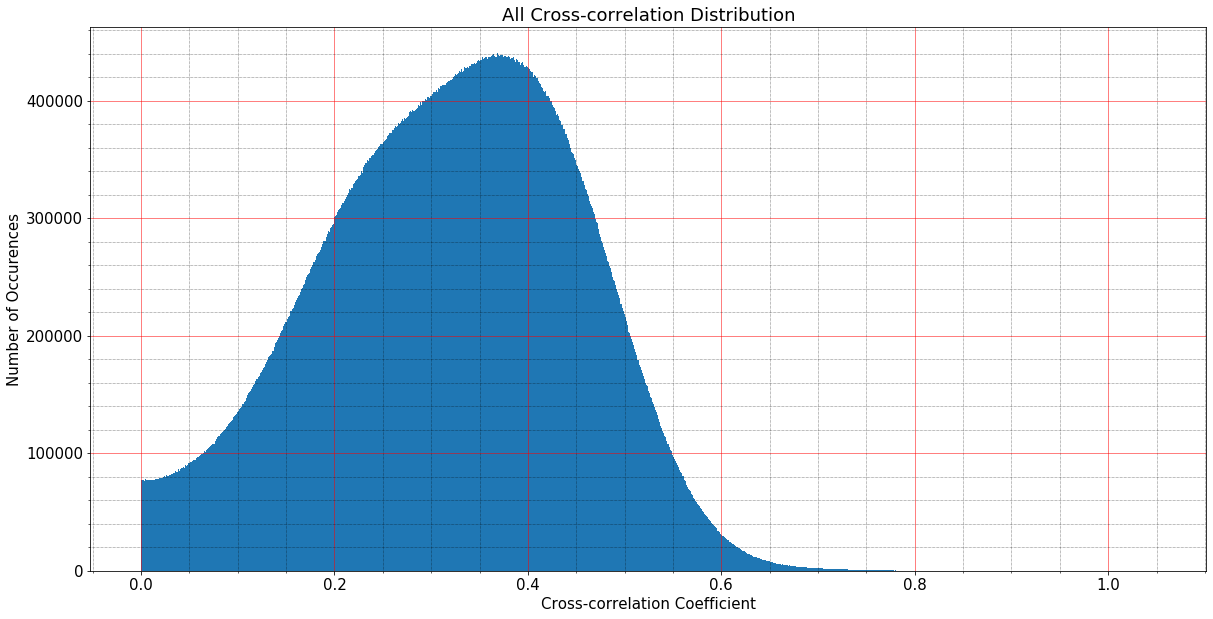

In [28]:
# plotting the distribution of the all the correlation

plt.figure(figsize=(20,10))
binning = np.arange(0, 1.05, 0.001).tolist()
value_of_each_bin = plt.hist(correlation_series, bins = binning)
plt.minorticks_on()
plt.rc('font', **font)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("All Cross-correlation Distribution")
plt.xlabel("Cross-correlation Coefficient")
plt.ylabel("Number of Occurences")

# Maximum Correlation

In [31]:
# we would like to get the largest correlation for each of the machines
# note that we use the 2nd largest correlation as the largest correlation is 1 which is the correlation with itself

def second_largest_number(list1):
    k=max(list1[0],list1[1]) 
    secondmax=min(list1[0],list1[1]) 

    for i in range(2,len(list1)): 
        if list1[i]>k: 
            secondmax=k
            k=list1[i] 
        else: 
            if list1[i]>secondmax: 
                secondmax=list1[i]
    return secondmax            

with progressbar.ProgressBar(max_value = len(all_cpu_correlation)) as bar:
    for index,x in enumerate(all_cpu_correlation):
        bar.update(index)
        map_max_correlation[x] = second_largest_number(all_cpu_correlation[x])
    
df_max_correlation = pd.Series(map_max_correlation)    
df_max_correlation

0        0.859551
1        0.599362
2        0.454142
3        0.605835
4        0.657417
           ...   
12471    0.693923
12472    0.515670
12473    0.598865
12474    0.534777
12475    0.532983
Name: 1, Length: 12476, dtype: float64

Text(0, 0.5, 'Number of Occuerences')

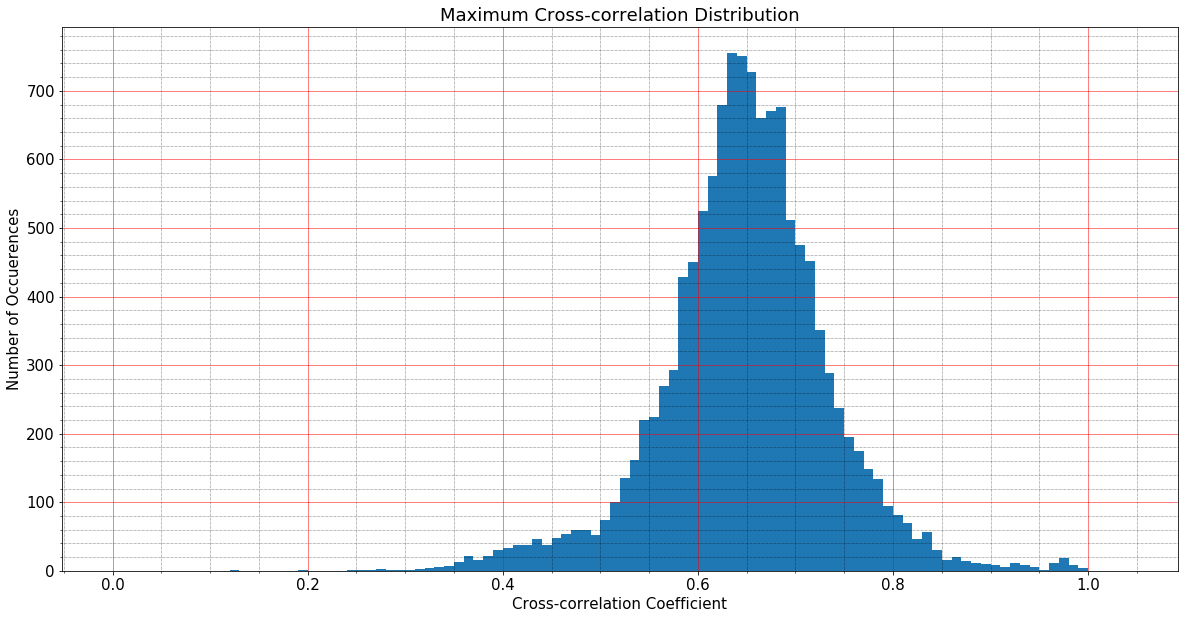

In [32]:
# plotting the distribution of the maximum correlation

plt.figure(figsize=(20,10))
binning = np.arange(0, 1.05, 0.01).tolist()
value_of_each_bin = plt.hist(df_max_correlation, bins = binning)
plt.minorticks_on()
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Maximum Cross-correlation Distribution")
plt.xlabel("Cross-correlation Coefficient")
plt.ylabel("Number of Occuerences")

# Cross-correlation with Window

In [33]:
# We observe how the correlation between different machines change over time with a one day window

def cross_correlation_with_window(timeseries1, timeseries2):
    cross_correlation_ls = []
    for shift in range(0,288*28):
        df = pd.DataFrame({0: (timeseries1[shift:shift+288]), 1: (timeseries2[shift:shift+288])})
        cross_correlation_ls.append(df.corr()[0][1])
        
    return cross_correlation_ls

def plot_crosscorrelation_with_window(index1, index2, marker = False):
    cross = cross_correlation_with_window(full_cpu[index1].to_list(),full_cpu[index2].to_list())
    plt.figure(figsize=(16,4))
    plt.plot(x_axis[0:len(cross)], cross, color = 'blue')  
    if(marker):
        plt.plot(x_axis[288*1], cross[288*1], color = 'red', marker = "o",markersize=12)  
        plt.plot(x_axis[288*5], cross[288*5], color = 'green', marker = "o",markersize=12) 
    plt.title("Cross-correlation between Machine " + str(index1) + " and Machine " + str(index2)+ " vs Shift", fontsize = 18)  
    plt.xlim(-1.4,30.4) 
    plt.xlabel("Shift (Day)", fontsize = 16)  
    plt.ylabel("Cross-correlation \n Coefficient", fontsize = 16)  
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.savefig("cross_mark_"+ str(index1) + "_" + str(index2))
#     plt.savefig("cross_mark")
    plt.show()
    
    return plt

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


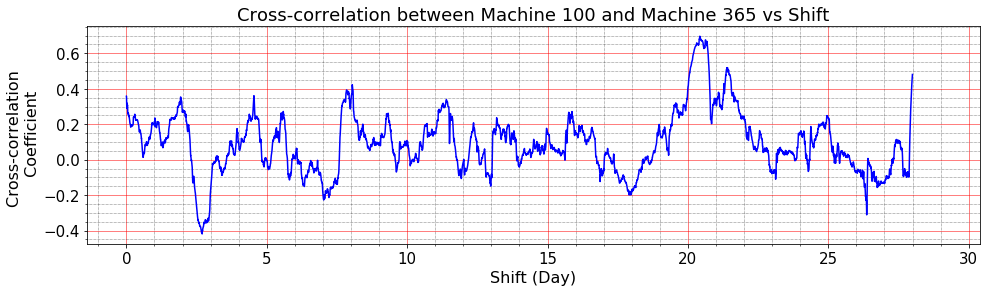

<module 'matplotlib.pyplot' from '/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [34]:
plot_crosscorrelation_with_window(100,365)

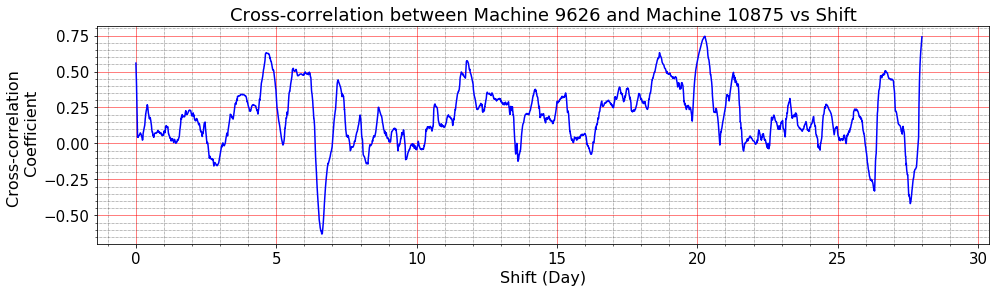

<module 'matplotlib.pyplot' from '/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [35]:
plot_crosscorrelation_with_window(9626,10875)

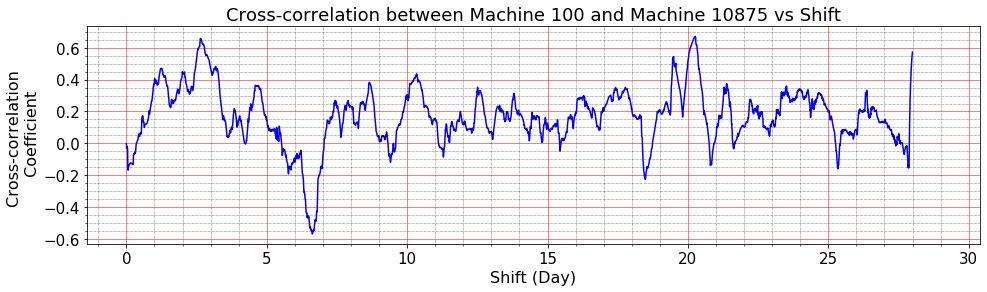

<module 'matplotlib.pyplot' from '/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [36]:
plot_crosscorrelation_with_window(100,10875)

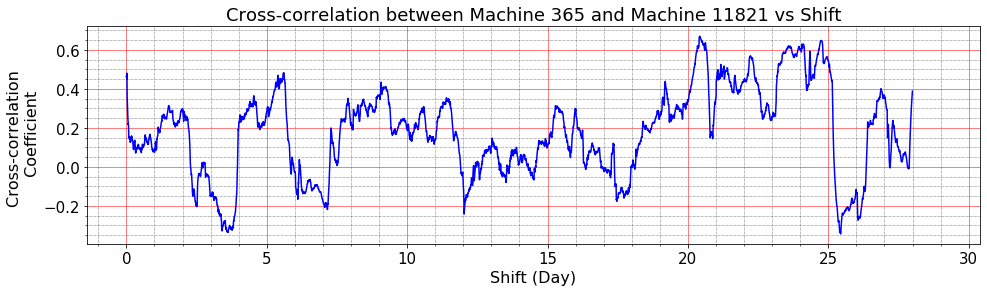

<module 'matplotlib.pyplot' from '/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [37]:
plot_crosscorrelation_with_window(365,11821)

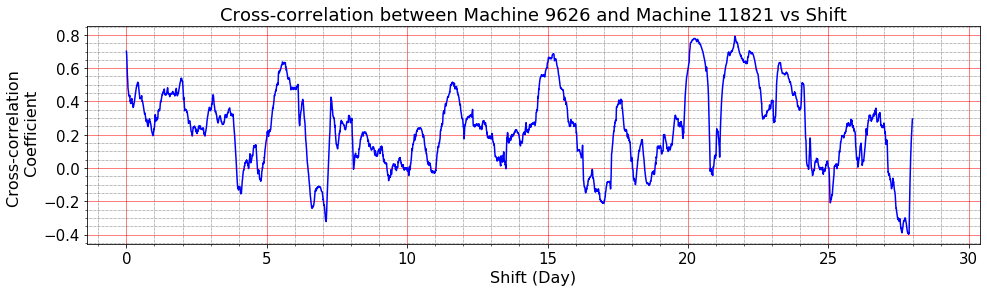

<module 'matplotlib.pyplot' from '/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [38]:
plot_crosscorrelation_with_window(9626,11821)

# Cross-correlation with Lag

In [7]:
def correlation_with_lag(timeseries1, timeseries2, number_of_days = 8):
    ''' 
    Find the correlation between timeseries1 and timeseries2
    Lags is introduced to timeseries2 for number_of_days 
    Returns: list of Correlation, each with different lag
    '''
    
    list_of_correlation = []
    timeseries1 = timeseries1.tolist()
    timeseries2 = timeseries2.tolist()
    length = len(timeseries1)
    for lag in range(0, 288*number_of_days):
        df = pd.DataFrame({0: (timeseries1[0:(length - lag)]), 1: (timeseries2[lag:])})
        list_of_correlation.append(df.corr()[0][1])
        
    return list_of_correlation

def abs_timeseries(timeseries):
    answer = []
    for x in timeseries:
        answer.append(np.abs(x))
        
    return answer

def largest_correlation_index(correlation_coef_list):
    abs_list = abs_timeseries(correlation_coef_list)
    return (abs_list.index(max(abs_list)))

In [8]:
def plot_correlation_with_lag(index1, index2, days = 8, graphs = "both"):
    '''
    plotting the correlation with lag
    
    params:
    index1, index2 -- index of pairs of machine to compute
    days -- days of lag in which we would like to study
    graphs --
        "both": plot both absolute value and non absolute value
        "one-sided": plot absolute value
        "two-sided": plot non-absolute value
    '''
    
    Rxy = correlation_with_lag(full_cpu[index1],full_cpu[index2], number_of_days = days)
    
    plt.figure(figsize=(20,5))
    plt.grid()
    if(graphs == "both"):
        plt.plot(x_axis[0:len(Rxy)],Rxy, color = 'blue', label = "Correlation")
        plt.plot(x_axis[0:len(Rxy)],abs_timeseries(Rxy), color = 'red', label = "Correlation Absolute Value")
    elif(graphs == "one-sided"):
        plt.plot(x_axis[0:len(Rxy)],abs_timeseries(Rxy), color = 'red', label = "Correlation Absolute Value")
    elif(graphs == "two-sided"):
        plt.plot(x_axis[0:len(Rxy)],Rxy, color = 'blue', label = "Correlation")
    else:
        raise Exception("graphs take in 'both', 'one-sided' or 'two-sided'")
        
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("Pearson's Correlation between Machine " + str(index1) + " and Machine " + str(index2))  
    plt.xlabel("Lag on Machine " + str(index2))  
    plt.ylabel("Correlation") 
    plt.legend()
    plt.show()
    
    return Rxy

def correlation_details(index1, index2, correlation_list, details = True):
    '''get details about the correlation with lag of machine index1 and index2'''
    
    index_of_largest = largest_correlation_index(correlation_list) 
    difference = np.abs(correlation_list[index_of_largest]) - np.abs(correlation_list[0])
    if(details):    
        print("Strongest correlation happen at index " + str(index_of_largest) + " with value: " + str(correlation_list[index_of_largest]))
        print("Correlation at index 0 has value: " + str(correlation_list[0]))
        print("Different between stongest correlation with correlation without lag: " + str(difference))
        
    details = [int(index1), int(index2), index_of_largest ,correlation_list[index_of_largest], correlation_list[0], difference]    
    header = ["Full CPU Index 1","Full CPU Index 2", "Index of Strongest Correlation", "Strongest Correlation", "Correlation without Lag", "Difference"]
    return pd.DataFrame(details, index = header, columns = [str(index1) + "/" +str(index2)]).transpose()

def ls_of_cor_ls(index_list):
    '''compile the correlation with lag of all pairs of machine in index_list'''
    
    import progressbar
    
    temp = []
    answer = []
    counter = 0
    with progressbar.ProgressBar(max_value = len(index_list)*len(index_list)) as bar:
        bar.update(0)
        for x in index_list:
            for y in index_list:
                temp.append(x)
                temp.append(y)
                temp.append(correlation_with_lag(full_cpu[x], full_cpu[y]))
                answer.append(temp)
                temp = []
                counter += 1
                bar.update(counter)
        
    return answer

def correlation_matrix(correlation_ls, samples_ls, characteristic):
    '''
    get the lag with the maximum cross-correlation with lag between all pairs of machines
    
    returns df with lag with maximum cross-correlation with lag between all pairs of machines
    '''
    
    answer = pd.DataFrame(index = samples_ls, columns = samples_ls).fillna(np.NaN)
    for x in correlation_ls:
        answer[x[0]][x[1]] = correlation_details(x[0], x[1], x[2], details = False)[characteristic].iloc[0]
    
    return answer

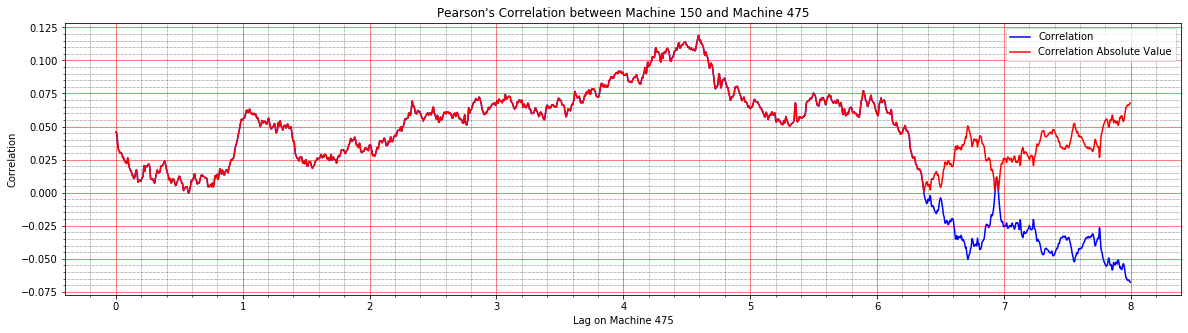

In [9]:
cor_150_475 = plot_correlation_with_lag(150, 475)

In [10]:
correlation_details(150, 475, cor_150_475)

Strongest correlation happen at index 1323 with value: 0.11893018283540135
Correlation at index 0 has value: 0.04569095787683514
Different between stongest correlation with correlation without lag: 0.07323922495856622


,Full CPU Index 1,Full CPU Index 2,Index of Strongest Correlation,Strongest Correlation,Correlation without Lag,Difference
150/475,150.0,475.0,1323.0,0.11893,0.045691,0.073239


In [11]:
ls_cor_ls = ls_of_cor_ls(random_samples[0:20])

100% (400 of 400) |######################| Elapsed Time: 0:26:53 Time:  0:26:53


In [12]:
strongest_correlation_matrix = correlation_matrix(ls_cor_ls,random_samples[0:20],"Index of Strongest Correlation")

In [13]:
strongest_correlation_matrix

,34,150,352,365,416,464,475,501,565,1033,1416,1537,1638,1674,1768,1931,1980,2201,2682,2834
34,0.0,0.0,0.0,0.0,350.0,0.0,1250.0,0.0,0.0,0.0,0.0,0.0,2212.0,0.0,0.0,0.0,0.0,1567.0,366.0,0.0
150,0.0,0.0,0.0,570.0,0.0,0.0,1712.0,10.0,0.0,0.0,0.0,153.0,2138.0,579.0,0.0,96.0,0.0,945.0,526.0,1127.0
352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,0.0,0.0,256.0,956.0,300.0,0.0
365,0.0,1.0,0.0,0.0,0.0,0.0,1232.0,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,952.0,0.0,0.0
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1290.0,218.0,0.0
464,0.0,0.0,0.0,0.0,0.0,0.0,2073.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,995.0,0.0,0.0
475,432.0,1323.0,90.0,0.0,0.0,576.0,0.0,0.0,0.0,0.0,0.0,460.0,252.0,1.0,0.0,1173.0,437.0,2280.0,467.0,251.0
501,0.0,715.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2179.0,0.0,0.0
565,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,0.0,0.0,1132.0,0.0,0.0
1033,0.0,313.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2155.0,0.0,0.0,0.0,436.0,2054.0,0.0,0.0
